In [1]:
#Importing libraries

import pandas as pd
import numpy as np
from uncertainties import *
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
from matplotlib import gridspec
from scipy import interpolate, integrate

In [2]:
#Reading data

temp = pd.read_csv('data/temp.csv')

In [3]:
#Constants and values

m_0 = ufloat(241.1, 0.03)
m_1 = ufloat(499.5, 0.03) - m_0
m_2 = ufloat(499.9, 0.03) - m_0
t_1 = ufloat(19.4, 0.03)
t_2 = ufloat(29.9, 0.03)
t = ufloat(24.4, 0.03)
c = ufloat(4.19, 0)

m = ufloat(576.8, 0.04)
tau = ufloat(1334.4, 0.03)
P = ufloat(30.3, 0)
dt = ufloat(15.8, 0.04)

In [4]:
#Calculations

temp['tk'] = (temp['tk_1'] + temp['tk_2']) / 2 
temp['t0'] = (temp['t0_1'] + temp['t0_2']) / 2 
temp['tk-t0'] = temp['tk'] - temp['t0']

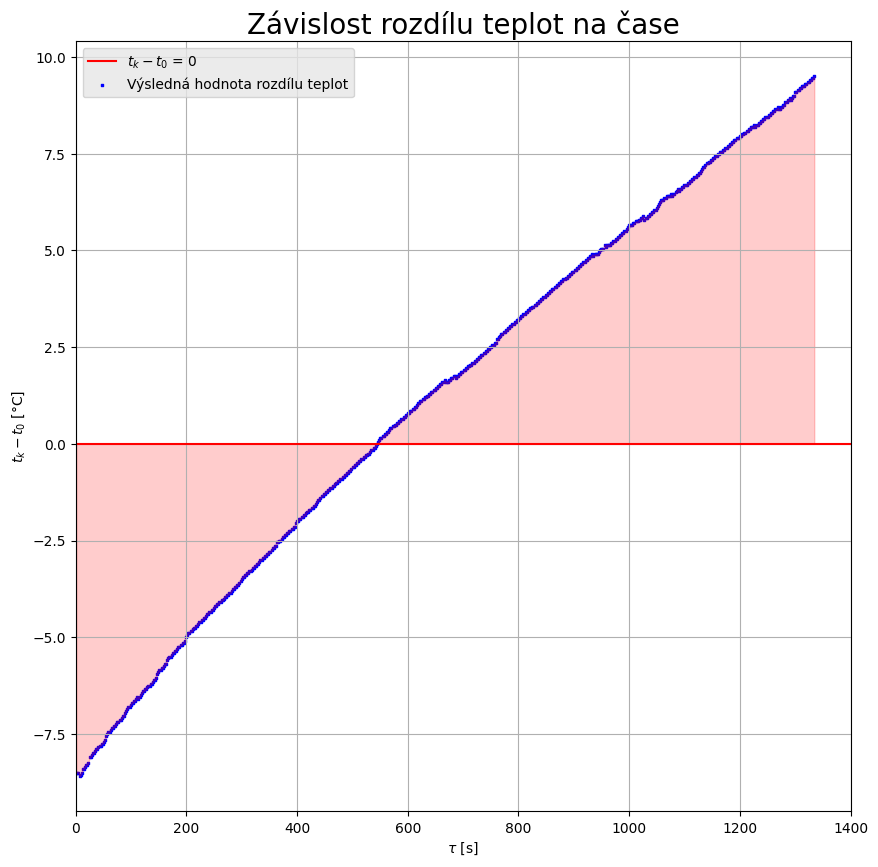

In [5]:
#Plotting

fig, ax = plt.subplots(figsize=(10,10))

ax.grid()
ax.set_title('Závislost rozdílu teplot na čase')

ax.title.set_fontsize(20)
ax.set_xlabel(r'$\tau$ [s]')
ax.xaxis.label.set_fontsize(10)
ax.set_ylabel('$t_k-t_0$ [°C]')
ax.yaxis.label.set_fontsize(10)
ax.axhline(y=0, c="red", label="$t_k-t_0$ = 0")
plt.xlim([0, 1400])

ax.scatter(temp['tau'], temp['tk-t0'],
           s=3, c='blue', marker="s", label='Výsledná hodnota rozdílu teplot')

ax.fill_between(temp['tau'],temp['tk-t0'],
           color= "red", alpha= 0.2)

legend = ax.legend(scatterpoints=1,markerscale = 1)
frame = legend.get_frame()
frame.set_facecolor('0.90')

plt.show() 
fig.savefig('plots/temp.png', bbox_inches='tight') 

In [6]:
#Calculations 2

f = interpolate.interp1d(temp['tau'], temp['tk-t0'], kind='cubic', bounds_error=False)

def integrand(x):
    return f(x)
    
result = integrate.quad(integrand, 1.22566, 1140.88)
print(result)

print(f(1140.88))
print(f(1.22566))

k = ((m_2*(t_2-t))/(t-t_1)) - m_1
print(k)

K = k * c
print(K)

print((m*c + K)*dt ,'=', P*tau)
print(np.mean(temp['t0']))
print((m*c + K)*dt - P*tau) 

c_2 = (((P*tau)/(dt)) - K)/m
print(c_2)

(-0.09259534697978282, 2.978911899426314)
7.248363258055353
-8.5
26+/-4
110+/-17
(3.993+/-0.028)e+04 = 40432.3+/-0.9
20.34219219219219
(-5.1+/-2.8)e+02
4.246+/-0.031


C:\Users\shepo\AppData\Local\Temp\ipykernel_17836\2104672683.py:8: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  result = integrate.quad(integrand, 1.22566, 1140.88)
